<a href="https://colab.research.google.com/github/BerlianiLarasati/IT-Salary-Analysis/blob/main/IT_Salary_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IT SALARY SURVEY 2020**

# Import Library dan Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dataset/IT Salary Survey EU  2020.csv')

#Data Preprocessing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1253 entries, 0 to 1252
Data columns (total 23 columns):
 #   Column                                                                                                                   Non-Null Count  Dtype  
---  ------                                                                                                                   --------------  -----  
 0   Timestamp                                                                                                                1253 non-null   object 
 1   Age                                                                                                                      1226 non-null   float64
 2   Gender                                                                                                                   1243 non-null   object 
 3   City                                                                                                                     1253 non-null   o

In [ ]:
#drop unused columns
df.drop(
    columns=[
        "Have you been forced to have a shorter working week (Kurzarbeit)? If yes, how many hours per week",
        "Have you received additional monetary support from your employer due to Work From Home? If yes, how much in 2020 in EUR",
        "Annual bonus+stocks one year ago. Only answer if staying in same country",
        "Yearly bonus + stocks in EUR",
        "Annual brutto salary (without bonus and stocks) one year ago. Only answer if staying in the same country",
        'Timestamp'],
    inplace = True
)

In [ ]:
#rename columns
df.rename(columns = {
    'Total years of experience':'experience',
    'Years of experience in Germany':'germany_experience',
    'Seniority level':'work_level',
    'Your main technology / programming language':'main_tech',
    'Other technologies/programming languages you use often':'other_tech',
    'Number of vacation days':'vacation_days',
    'Yearly brutto salary (without bonus and stocks) in EUR':'yearly_salary',
    'Employment status':'emp_state',
    'Сontract duration':'contract_duration',
    'Main language at work':'main_language',
    'Company size':'company_size',
    'Company type':'company_type',
    'Have you lost your job due to the coronavirus outbreak?':'covid_lost',
    'Age':'age',
    'Gender':'gender',
    'City':'city','Position ':'position'

}, inplace = True)

#Data Cleaning

Duplicate Data

In [ ]:
# covid_lost Column
dics ={
"i didn't but will be looking for new one because of covid":'No',
'kurzarbeitzeit for 1.5 months':'No',
'Have been a freelancer at the beginning of year':'No',
'No, but there was a salary cut at 10% for 3 months and then at 5% for further 3 months':'No',
'Lost the job but for different reason':'No',
'Leads and project inquiries have slowed down' :'No',
'Laid off for a bit':'No',
'yes but found a new one with better pay / perks':'Yes'
}

for i in dics:
    df['covid_lost'] = df['covid_lost'].apply(lambda x:dics.get(i) if (x==i) else x )

In [ ]:
# main_language Column
dics = {
'English and German':'English',
'50/50':'English',
'Русский':'Russian',
'both':'English',
'Russian, English':'English'
}

for i in dics:
    df['main_language'] = df['main_language'].apply(lambda x:dics.get(i) if (x==i) else x )

In [ ]:
# contract_duration Column
dics = {
'0':'Temporary contract'
}

for i in dics:
    df['contract_duration'] = df['contract_duration'].apply(lambda x:dics.get(i) if (x==i) else x )

In [ ]:
# emp_state Column
dics = {
'Full-time employee':'full-time',
'Self-employed (freelancer)':'freelancer',
'Company Director':'full-time',
'Founder':'full-time',
'Part-time employee':'part-time',
'working student':'part-time',
'Working Student':'part-time',
"Full-time position, part-time position, & self-employed (freelancing, tutoring)":'full-time',
"full-time, but 32 hours per week (it was my request, I'm a student)":'part-time',
'Werkstudent':'part-time'
}

for i in dics:
    df['emp_state'] = df['emp_state'].apply(lambda x:dics.get(i) if (x==i) else x )

In [ ]:
# Experience Column
dics = {
    '1,5':'1.50',
    '1 (as QA Engineer) / 11 in total':'11',
    '2,5':'2.5',
    '15, thereof 8 as CTO':'15',
    '6 (not as a data scientist, but as a lab scientist)':'6',
    '383':'38',
    'less than year':'0'
}

for i in dics:
    df['experience'] = df['experience'].apply(lambda x:dics.get(i) if (x==i) else x )

In [ ]:
# Germany_experience  Column
dics = {'1,5':'1.5',
'4,5':'4.5',
'1,7':'1.7',
'3,5':'3.5',
'< 1':'0',
'4 (in Switzerland), 0 (in Germany)':'0',
'4 month':'0',
'2,5':'2.5',
'0,5':'0.5',
'3 months':'0',
'3 (in Poland)':'0',
'<1':'0',
'⁰':'0',
'0,3':'0',
'-':'0',
'6 (not as a data scientist, but as a lab scientist)':'0','0.2':'0',
'less than year':'0'
}


for i in dics:
    df['germany_experience'] = df['germany_experience'].apply(lambda x:dics.get(i) if (x==i) else x )

In [ ]:
# work_level Column
dics = {
    'Intern':'intern',
    'Student':'student',
    "no idea, there are no ranges in the firm ":'Senior'
}


for i in dics:
    df['work_level'] = df['work_level'].apply(lambda x:dics.get(i) if (x==i) else x )

In [ ]:
# vacation_days  Column
dics = {
    '(no idea)':'0',
    '30 in contract (but theoretically unlimited)':'30',
    'Unlimited ':'100',
    '~25':'25',
    '23+':'25',
    'Unlimited':'100',
    '24 labour days':'24',
    'unlimited ':100,
    'unlimited':100
}


for i in dics:
  df['vacation_days'] = df['vacation_days'].apply(lambda x:dics.get(i) if (x==i) else x )

Missing Value

In [ ]:
df.isnull().sum()

age                    27
gender                 10
city                    0
position                6
experience             16
germany_experience     32
work_level             12
main_tech             127
other_tech            157
yearly_salary           0
vacation_days          68
emp_state              17
contract_duration      29
main_language          16
company_size           18
company_type           25
covid_lost             20
dtype: int64

In [ ]:
#Drop Rows Of Null
df.dropna(subset=['age'], how='all', inplace=True)
df.dropna(subset=['gender'], how='all', inplace=True)
df.dropna(subset=['position'], how='all', inplace=True)
df.dropna(subset=['experience'], how='all', inplace=True)
df.dropna(subset=['germany_experience'], how='all', inplace=True)
df.dropna(subset=['work_level'], how='all', inplace=True)
df.dropna(subset=['main_tech'], how='all', inplace=True)
df.dropna(subset=['other_tech'], how='all', inplace=True)
df.dropna(subset=['vacation_days'], how='all', inplace=True)
df.dropna(subset=['emp_state'], how='all', inplace=True)
df.dropna(subset=['contract_duration'], how='all', inplace=True)
df.dropna(subset=['main_language'], how='all', inplace=True)
df.dropna(subset=['company_size'], how='all', inplace=True)
df.dropna(subset=['company_type'], how='all', inplace=True)
df.dropna(subset=['covid_lost'], how='all', inplace=True)

In [ ]:
#Correct data type
df['age']=df['age'].astype('int64')
df['experience']=df['experience'].astype('float')
df['germany_experience']=df['germany_experience'].astype('float')
df['vacation_days']=df['vacation_days'].astype('float')

# Data Final

In [ ]:
df.head()

,age,gender,city,position,experience,germany_experience,work_level,main_tech,other_tech,yearly_salary,vacation_days,emp_state,contract_duration,main_language,company_size,company_type,covid_lost
0,26,Male,Munich,Software Engineer,5.0,3.0,Senior,TypeScript,"Kotlin, Javascript / Typescript",80000.0,30.0,full-time,Unlimited contract,English,51-100,Product,No
2,29,Male,Berlin,Software Engineer,12.0,6.0,Lead,Javascript / Typescript,"Javascript / Typescript, Docker",120000.0,30.0,freelancer,Temporary contract,English,101-1000,Product,Yes
4,37,Male,Berlin,Backend Developer,17.0,6.0,Senior,C# .NET,".NET, SQL, AWS, Docker",62000.0,29.0,full-time,Unlimited contract,English,101-1000,Product,No
5,32,Male,Berlin,DevOps,5.0,1.0,Senior,"AWS, GCP, Python,K8s","Python, AWS, Google Cloud, Kubernetes, Docker",76000.0,30.0,full-time,Unlimited contract,English,11-50,Startup,No
7,24,Male,Berlin,Frontend Developer,5.0,1.0,Senior,Typescript,Javascript / Typescript,65000.0,27.0,full-time,Unlimited contract,English,1000+,Product,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 931 entries, 0 to 1252
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 931 non-null    int64  
 1   gender              931 non-null    object 
 2   city                931 non-null    object 
 3   position            931 non-null    object 
 4   experience          931 non-null    float64
 5   germany_experience  931 non-null    float64
 6   work_level          931 non-null    object 
 7   main_tech           931 non-null    object 
 8   other_tech          931 non-null    object 
 9   yearly_salary       931 non-null    float64
 10  vacation_days       931 non-null    float64
 11  emp_state           931 non-null    object 
 12  contract_duration   931 non-null    object 
 13  main_language       931 non-null    object 
 14  company_size        931 non-null    object 
 15  company_type        931 non-null    object 
 16  covid_l

In [ ]:
df.describe()

,age,experience,germany_experience,yearly_salary,vacation_days
count,931.000000,931.000000,931.000000,931.000000,931.000000
mean,32.481203,8.871214,3.714286,72268.475832,28.309882
std,5.559495,5.373800,3.558578,34074.785621,5.658740
min,20.000000,0.000000,0.000000,10001.000000,0.000000
25%,29.000000,5.000000,1.000000,60000.000000,27.000000
50%,32.000000,8.000000,3.000000,70000.000000,28.000000
75%,35.000000,12.000000,5.000000,80000.000000,30.000000
max,66.000000,40.000000,30.000000,850000.000000,100.000000


# Exploratory Data Analysis

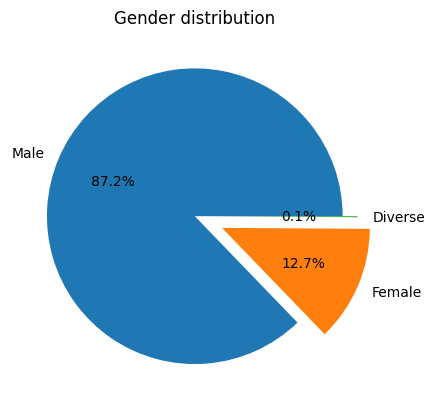

In [ ]:
gender=df['gender'].value_counts()
plt.pie(gender,labels=gender.index,autopct='%.1f%%',explode=[0,0.2,0.1])
plt.title('Gender distribution')
plt.show()

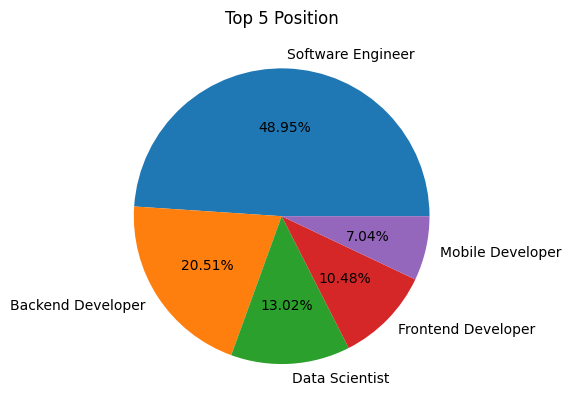

In [ ]:
plt.pie(df['position'].value_counts().head(5), labels=df['position'].value_counts().head(5).index ,  autopct= '%1.2F%%')
plt.title('Top 5 Position')
plt.show()

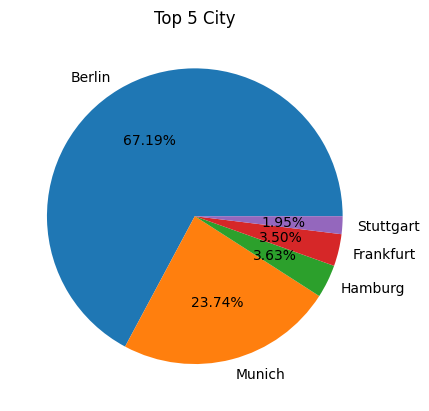

In [ ]:
plt.pie(df['city'].value_counts().head(5), labels=df['city'].value_counts().head(5).index ,  autopct= '%1.2F%%')
plt.title('Top 5 City')
plt.show()

<ipython-input-24-f1d8e9bcf595>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salary_city = df.groupby('city', as_index= False).mean().sort_values('yearly_salary', ascending = False)


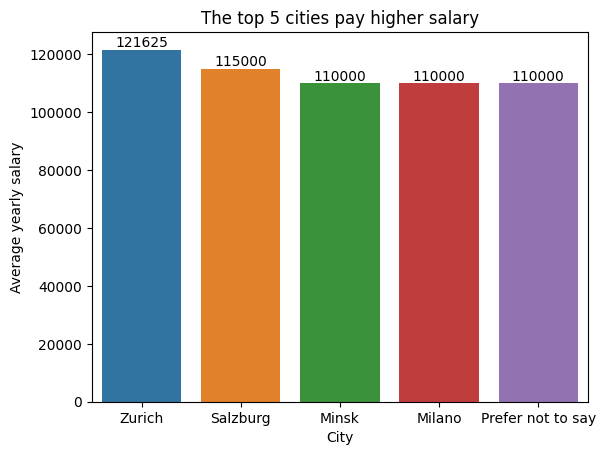

In [ ]:
salary_city = df.groupby('city', as_index= False).mean().sort_values('yearly_salary', ascending = False)
salary_city = salary_city.head(5)
ax = sns.barplot(data= salary_city, x= 'city', y= 'yearly_salary')
plt.title('The top 5 cities pay higher salary')
plt.xlabel('City')
plt.ylabel('Average yearly salary')
plt.bar_label(ax.containers[0], label_type = 'edge')
plt.show()

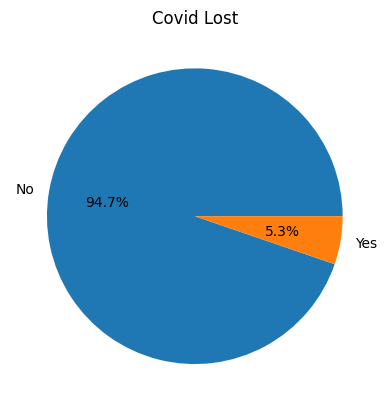

In [ ]:
covid=df['covid_lost'].value_counts()
plt.pie(covid,labels=covid.index,autopct='%.1f%%')
plt.title('Covid Lost')
plt.show()

<ipython-input-26-48e34b3853c5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  salary_seniority = df.groupby('work_level', as_index= False).mean().sort_values('yearly_salary', ascending = False)


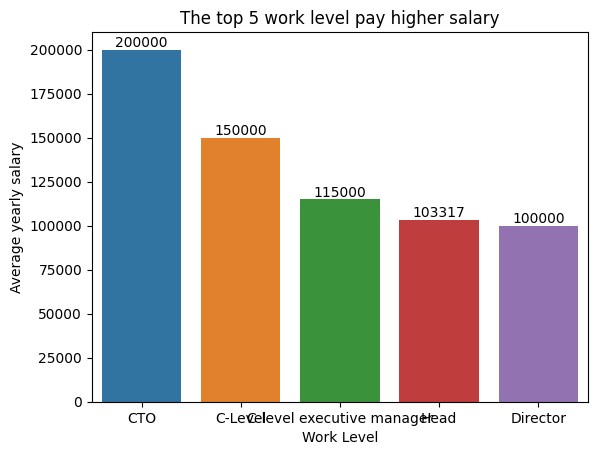

In [ ]:
salary_seniority = df.groupby('work_level', as_index= False).mean().sort_values('yearly_salary', ascending = False)
salary_seniority = salary_seniority.head(5)
ax = sns.barplot(data= salary_seniority, x= 'work_level', y= 'yearly_salary')
plt.title('The top 5 work level pay higher salary')
plt.xlabel('Work Level')
plt.ylabel('Average yearly salary')
plt.bar_label(ax.containers[0], label_type = 'edge')
plt.show()

In [ ]:
df.to_csv('data_ITSalary.csv')

In [ ]:
!pip install nbconvert

In [ ]:
!jupyter nbconvert --to html GG3DAGP0173_MIDTERM_TEST_FILE_1.ipynb

[NbConvertApp] WARNING | pattern 'GG3DAGP0173' matched no files
[NbConvertApp] WARNING | pattern '-' matched no files
[NbConvertApp] WARNING | pattern 'Python.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    